## Pneumonia
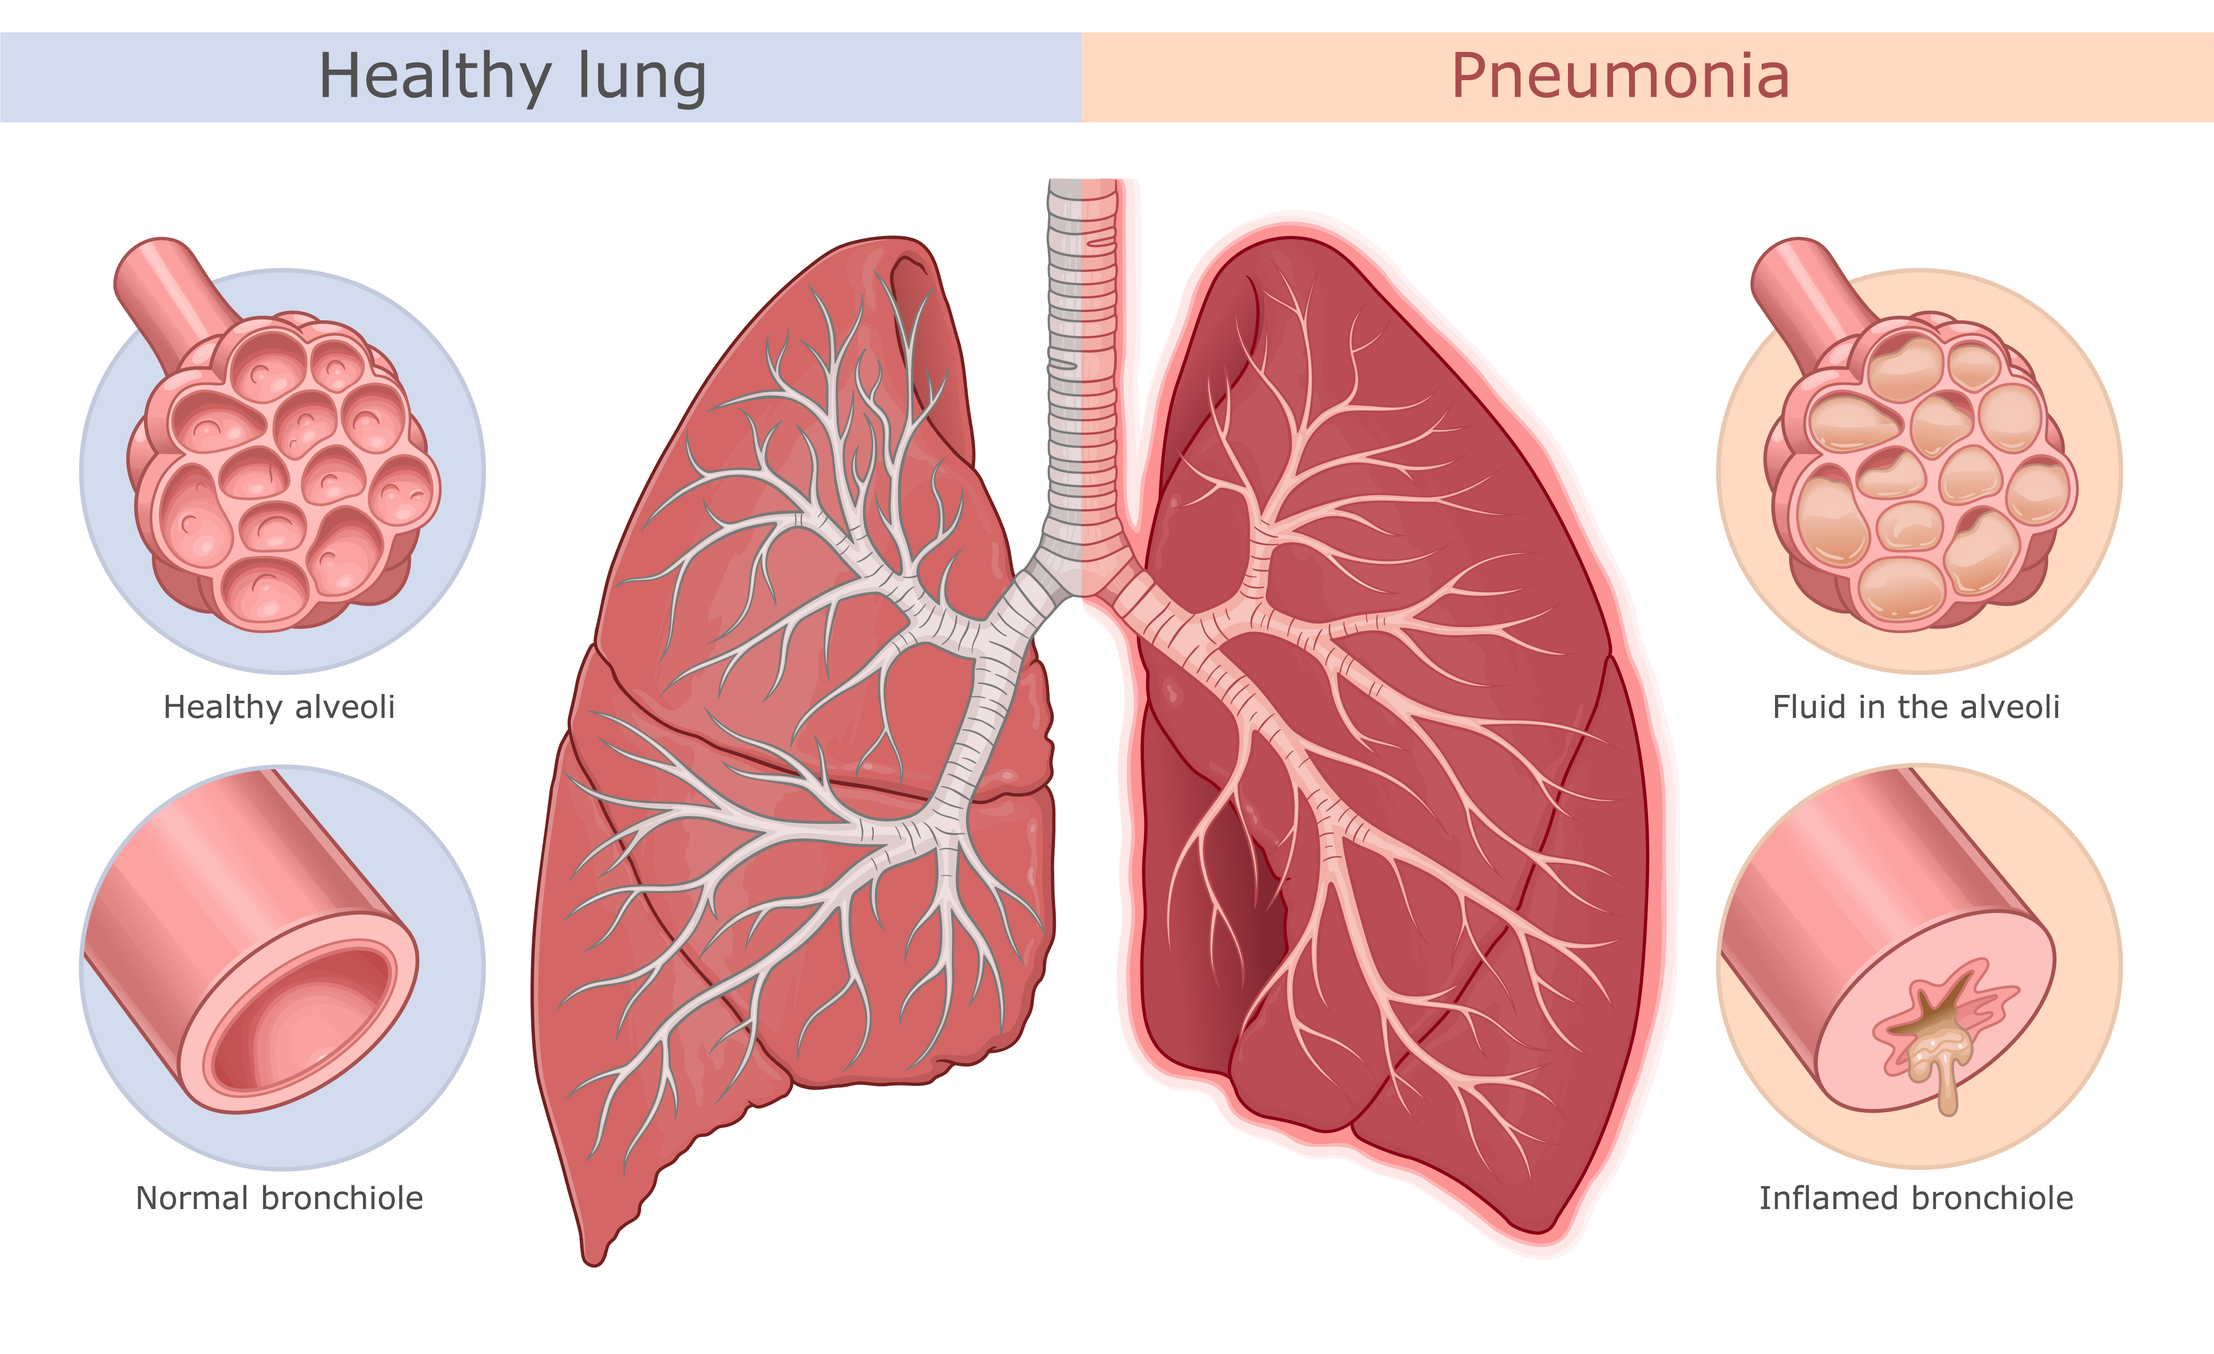




---



In [2]:
# import dataset from kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:36<00:00, 67.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


## The Dataset



In [3]:
import pandas as pd
import numpy as np



In [4]:
import os

dataset_path= "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
for root,dirs, files in os.walk(dataset_path):
  print(root)
  for file in files[:5]:# print first 5 files per folder
    print(" ", file)

/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/PNEUMONIA
  person470_bacteria_1996.jpeg
  person331_bacteria_1526.jpeg
  person75_bacteria_366.jpeg
  person64_bacteria_310.jpeg
  person942_virus_1611.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/NORMAL
  NORMAL2-IM-0698-0001.jpeg
  IM-0622-0001.jpeg
  NORMAL2-IM-1318-0001.jpeg
  NORMAL2-IM-1241-0001.jpeg
  NORMAL2-IM-1218-0001.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/PNEUMONIA
  person44_virus_94.jpeg


In [ ]:
import os # Helps in file handling, such as accessing image directories.
import pandas as pd

# Path to dataset
dataset_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# Dataset categories
categories = ["train", "test", "val"]

data = []

for category in categories:
    category_path = os.path.join(dataset_path, category)

    for label in os.listdir(category_path):  # Should not have a second argument
        label_path = os.path.join(category_path, label)

        if os.path.isdir(label_path):  # Ensure it's a directory
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                data.append((image_path, label, category))  # Store image path, label, and dataset type

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "dataset_type"])

df.head()


,image_path,label,dataset_type
0,/root/.cache/kagglehub/datasets/paultimothymoo...,PNEUMONIA,train
1,/root/.cache/kagglehub/datasets/paultimothymoo...,PNEUMONIA,train
2,/root/.cache/kagglehub/datasets/paultimothymoo...,PNEUMONIA,train
3,/root/.cache/kagglehub/datasets/paultimothymoo...,PNEUMONIA,train
4,/root/.cache/kagglehub/datasets/paultimothymoo...,PNEUMONIA,train


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    5856 non-null   object
 1   label         5856 non-null   object
 2   dataset_type  5856 non-null   object
dtypes: object(3)
memory usage: 137.4+ KB


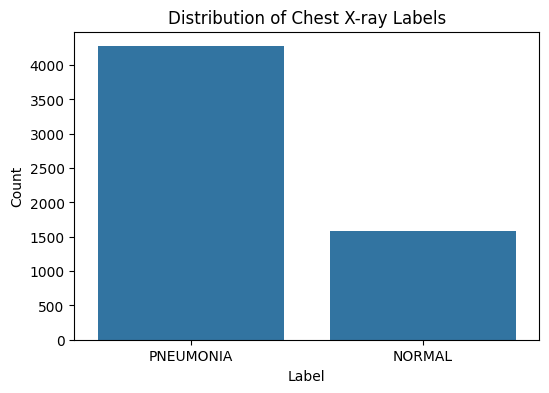

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"])
plt.title("Distribution of Chest X-ray Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
df["label"].value_counts()

,count
label,
PNEUMONIA,4273
NORMAL,1583


In [ ]:
df["dataset_type"].value_counts()

,count
dataset_type,
train,5216
test,624
val,16


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["dataset_type"])
plt.title("Distribution of Chest X-ray Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#display images of both classes

# Model training

In [ ]:
# loading libraries
import keras # deep learning library that runs on top of TensorFlow
from keras.models import Sequential # A model type where layers are stacked sequentialls
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization # dense: A fully connected layer, Conv2D: A convolutional layer for extracting image features,
# maxpool2D: a pooling layer that reduces spatial dimensions, flatten: converts multi-dimensional arrays into a 1D Vecto, Dropout: randomly drops neurons to prevent overfitting,
# BatchNormalization: Normalizes activations to stabilize training
from keras.preprocessing.image import ImageDataGenerator# generates batches of tensor image data with real-time data augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau # reduces the learning rate when the model stops improving
import cv2 # opencv: used for image processing and manipulation